# Introduction to Quant Finance

## Module 2.2: Modelling Techniques

### 2.2.3 ARCH and GARCH

Put simply, the ARCH model is AR applied to the variance of the model. The GARCH model is an analysis of the variance of a model, using the ARMA model. Before we look at that, we first outline some of the key attributes that GARCH deals with.

**Heteroskedasticity** refers to the attribute of some variables to have a variance of residuals that varies wildly (almost everyone uses the term "wildly" here). It is indicative that there may be more factors that explain the way in which the data varies. Homoskedastic variables have a consistent variance, a key component, but not a sufficient one for stationarity (for instance, the variance may be constant, but there may be a trend in the mean).

A **conditional heteroskedastic** variable is one that has a conditional component. For instance, if the market drops it might go  into panic, causing further drops. This drop was conditional on the previous drop.


We now have the necessary components to understand the ARCH and GARCH models:

* ARCH stands for Autoregressive Conditionally Heteroskedastic
* GARCH stands for Generalized Autoregressive Conditionally Heteroskedastic 

We apply ARCH and GARCH models *after* we have fitted a model to the original dataset. Importantly, the residuals after fitting that first model should look like it is discrete noise. The ARCH modelling then looks for a pattern in the residuals of that model, specifically at a given lag. It is this variance over time that autoregressive models cannot model.


### ARCH Models

The ARCH(1) model is given by:

$ Var(y_t) = \alpha_0 + \alpha_1 y_{t-1}^2$


Which is the AR model, but on variance instaed of raw values.

The GARCH(1,1) model is 

$Var(y_t) = \alpha_0 + \alpha_1 y_{t-1}^2  + \alpha_2 Var(y_{t-1})$

Which you'll notice is the ARMA model applied to the variance rather than the absolute value.

Generalisations, such as GARCH(2, 2) are also possible by adding further lagged terms to each of the AR and MA components of the equation.

We'll generate some data that fits this model, and the shown the residual graph and autocorrelations:

In [1]:
%run setup.ipy

In [2]:
y = np.zeros(1000)

In [3]:
y[0] = np.random.normal()
for i in range(1, len(y)):
    y[i] = np.random.normal() * np.sqrt(5 + 0.75 * y[i-1]**2)

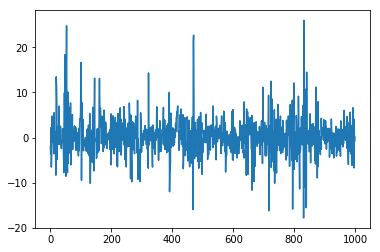

In [4]:
plt.plot(y)

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

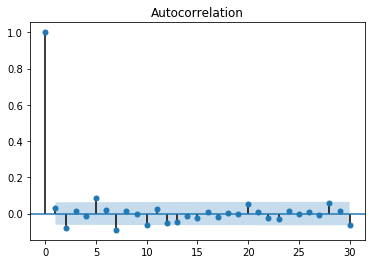

In [10]:
plot_acf(y, lags=30);

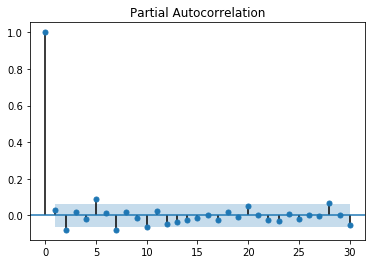

In [9]:
plot_pacf(y, lags=30);

Notice there isn't really much by the way of autocorrelation in y - it looks like white noise. This mimics the residuals *after* fitting a good model to the original data.

However, you might suspect a problem with a variance dependent on time. To test this, first we test the same correlation, but on the squared residuals:

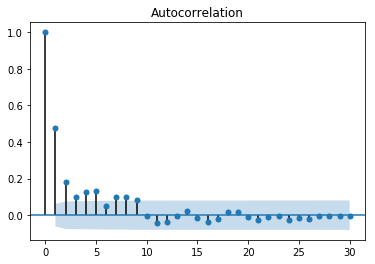

In [11]:
plot_acf(y**2, lags=30);

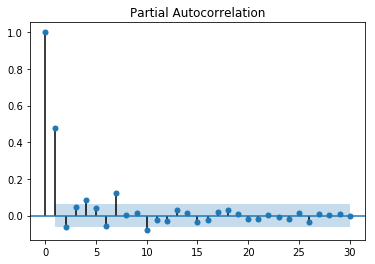

In [12]:
plot_pacf(y**2, lags=30);

Here you see a strong lagged autocorrelation at lag 1. If you see this result (for any reasonable lag), it is time to fit an ARCH model.

There is a useful arch model in the `arch` package

In [14]:
from arch import arch_model

In [16]:
model = arch_model(y)

In [20]:
results = model.fit()  # As per statsmodels

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2736.343316733789
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2731.72467194527
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2713.824686941148
Iteration:      4,   Func. Count:     28,   Neg. LLF: 2706.1894091041377
Iteration:      5,   Func. Count:     34,   Neg. LLF: 2682.992695534886
Iteration:      6,   Func. Count:     40,   Neg. LLF: 2668.1348188314605
Iteration:      7,   Func. Count:     47,   Neg. LLF: 2666.1974219318445
Iteration:      8,   Func. Count:     54,   Neg. LLF: 2657.1677586612846
Iteration:      9,   Func. Count:     60,   Neg. LLF: 2651.7642607345842
Iteration:     10,   Func. Count:     67,   Neg. LLF: 2650.943557550664
Iteration:     11,   Func. Count:     73,   Neg. LLF: 2650.4132819580263
Iteration:     12,   Func. Count:     79,   Neg. LLF: 2650.2865814748484
Iteration:     13,   Func. Count:     85,   Neg. LLF: 2650.1658581033234
Iteration:     14,   Func. Count:     91,   Neg. LLF: 265

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -2650.11
Distribution:                  Normal   AIC:                           5308.22
Method:            Maximum Likelihood   BIC:                           5327.85
                                        No. Observations:                 1000
Date:                Wed, Mar 27 2019   Df Residuals:                      996
Time:                        18:42:45   Df Model:                            4
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0779  7.561e-02      1.030      0.303 [-7.031e-02,  0.226]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          4.7338      0.431     10.972  5.199e-28      [  3.888,  5.579]
alpha[1]       0.8351  7.233e-02     11.546  7.745e-31      [  0.693,  0.977]
beta[1]        0.0108  1.524e-02      0.708      0.479 [-1.908e-02,4.065e-02]
=============================================================================

Covariance estimator: robust
"""

From here, you can see the values for alpha are non-zero, based on the p test and beta are approximately zero. Further, there is the omega value that is 4.7 (we used 5 for this above.

### Exercise:

Map the coefficients in the volatility results summary above to the model for GARCH above. Check the documentation for the function if needed.

## Combining the steps

Fitting an ARIMA model to the data, and then a GARCH model to the variance. With this data, we can then create predictions of future data.

An example prediction model would then combine the two models to come up with a prediction for the price of the next day.

TODO: Complete https://medium.com/auquan/time-series-analysis-for-finance-arch-garch-models-822f87f1d755 using the data provided here.

### Extended exercise

1. Download data
2. Fit models
3. Backtest strategy

More information: https://arch.readthedocs.io/en/latest/univariate/introduction.html